# Outlier

# IQR

In [1]:
import pandas as pd

data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'classe']

data.head()

,sepal_length,sepal_width,petal_length,petal_width,classe
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
#https://towardsdatascience.com/practical-implementation-of-outlier-detection-in-python-90680453b3ce
def remove_outlier_IQR(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3-Q1
    LB = Q1-1.5*IQR
    UB = Q3+1.5*IQR
    return df[(df < LB) | (df > UB)]

In [3]:
df_outlier_removed = remove_outlier_IQR(data['sepal_width'])
df_outlier_removed.index

Int64Index([15, 32, 33, 60], dtype='int64')

In [4]:
update_data = data.drop(df_outlier_removed.index)
update_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  146 non-null    float64
 1   sepal_width   146 non-null    float64
 2   petal_length  146 non-null    float64
 3   petal_width   146 non-null    float64
 4   classe        146 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


# LOF

In [5]:
#https://www.datatechnotes.com/2020/04/anomaly-detection-with-local-outlier-factor-in-python.html
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html
from sklearn.neighbors import LocalOutlierFactor
from numpy import quantile, where, random
import matplotlib.pyplot as plt

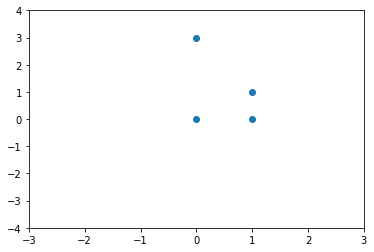

In [6]:
import numpy as np

x = np.array([[0,0], [1,0], [1,1], [0,3]])
plt.scatter(x[:,0], x[:,1])
plt.xlim([-3, 3])
plt.ylim([-4, 4])
plt.show()

In [7]:
lof = LocalOutlierFactor(n_neighbors=2, p=1)
y_pred = lof.fit_predict(x)
y_pred

array([ 1,  1,  1, -1])

In [8]:
lofs_f = lof.negative_outlier_factor_
lofs_f

array([-0.875     , -1.33333333, -0.875     , -2.        ])

In [9]:
lofs_index = where(y_pred==-1)
values = x[lofs_index]
values

array([[0, 3]])

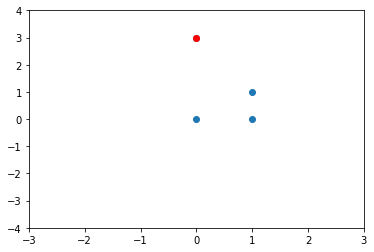

In [11]:
plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0],values[:,1], color='r')
plt.xlim([-3, 3])
plt.ylim([-4, 4])
plt.show()

In [25]:
#df_np = pd.DataFrame(x,columns=['c1','c2'])
#df_outlier_removed = remove_outlier_IQR(df_np['c2'])
#df_outlier_removed.index
#df_np.boxplot()

# Missing Values

In [13]:
import numpy as np
from sklearn.impute import SimpleImputer

dados = np.array([[1, 2], [np.nan, 3], [7, 6]])
dados

array([[ 1.,  2.],
       [nan,  3.],
       [ 7.,  6.]])

In [14]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
dados_t = imp.fit_transform(dados)
dados_t

array([[1., 2.],
       [4., 3.],
       [7., 6.]])

# Sampling

In [15]:
from sklearn.utils.random import sample_without_replacement

index = sample_without_replacement(150, 75, random_state=0)
index

array([114,  62,  33, 107,   7, 100,  40,  86,  76,  71, 134,  51,  73,
        54,  63,  37,  78,  90,  45,  16, 121,  66,  24,   8, 126,  22,
        44,  97,  93,  26, 137,  84,  27, 127, 132,  59,  18,  83,  61,
        92, 112,   2, 141,  43,  10,  60, 116, 144, 119, 108,  69, 135,
        56,  80, 123, 133, 106, 146,  50, 147,  85,  30, 101,  94,  64,
        89,  91, 125,  48,  13, 111,  95,  20,  15,  52])

In [16]:
sample_data = data.drop(index)
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  75 non-null     float64
 1   sepal_width   75 non-null     float64
 2   petal_length  75 non-null     float64
 3   petal_width   75 non-null     float64
 4   classe        75 non-null     object 
dtypes: float64(4), object(1)
memory usage: 3.5+ KB


# Feature Subset Selection: Correlation Filter Methods

In [17]:
print('Correlation:')
data.corr()

Correlation:


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

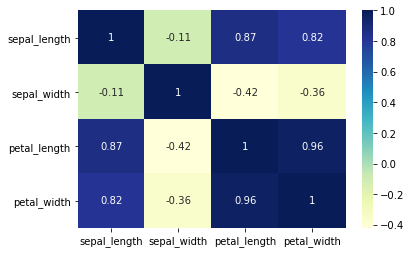

In [16]:
import seaborn as sns

sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')

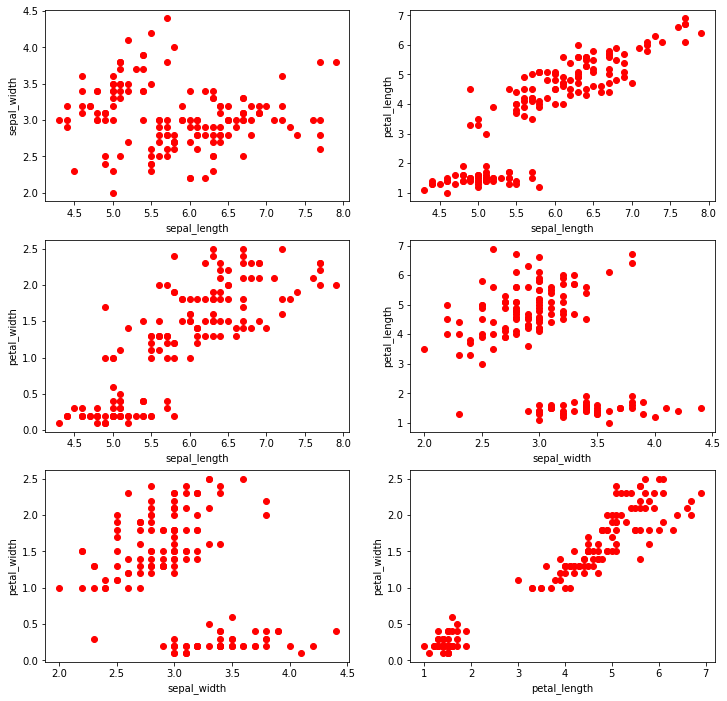

In [18]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(12,12))
index = 0
for i in range(3):
    for j in range(i+1,4):
        ax1 = int(index/2)
        ax2 = index % 2
        axes[ax1][ax2].scatter(data[data.columns[i]], data[data.columns[j]], color='red')
        axes[ax1][ax2].set_xlabel(data.columns[i])
        axes[ax1][ax2].set_ylabel(data.columns[j])
        index = index + 1

<AxesSubplot:>

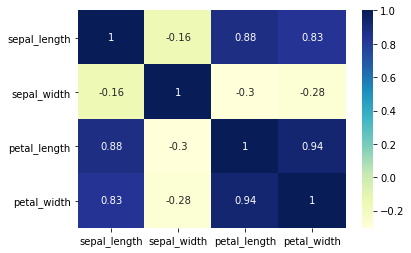

In [10]:
import seaborn as sns

sns.heatmap(data.corr(method='spearman'), annot=True, cmap='YlGnBu')

In [29]:
from scipy.stats import kendalltau

X = [1, 2, 3, 4, 5, 6, 7] 
Y = [1, 3, 6, 2, 7, 4, 5] 

corr = kendalltau(X, Y) 
corr

KendalltauResult(correlation=0.4285714285714286, pvalue=0.2388888888888889)

# Principal Component Analysis (PCA)

In [2]:
#deseja-se diminuir apenas o número de atributos
df = data.drop(columns="classe")
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()
df_padronizado = scaler.fit_transform(df)
df_padronizado

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [12]:
#pca = PCA()
#pca = PCA(n_components=0.7)#já fala quanto de variância quer explicar
pca = PCA(n_components=2)#já fala quantos componentes quer
projected = pca.fit_transform(df_padronizado)

print("Componentes Principais")
print(pca.components_)

print("\n")
print("Variâncias")
print(pca.explained_variance_ratio_)

component_names = ['component {}'.format(i) for i in range(len(pca.components_))]

print("\n")
components_df = pd.DataFrame(data=pca.components_,index=component_names,columns=df.columns)
components_df.head()

Componentes Principais
[[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]]


Variâncias
[0.72770452 0.23030523]




,sepal_length,sepal_width,petal_length,petal_width
component 0,0.522372,-0.263355,0.581254,0.565611
component 1,0.372318,0.925556,0.021095,0.065416


In [13]:
#row by its index
print(df.loc[[0]])
print(df_padronizado[[0]])
print(projected[[0]])

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
[[-0.90068117  1.03205722 -1.3412724  -1.31297673]]
[[-2.26454173  0.5057039 ]]


In [14]:
result = (0.522372 * -0.90068117) + (-0.263355 * 1.03205722) + (0.581254 * -1.3412724) + (0.565611 * -1.31297673)
result

-2.26454208212997

<AxesSubplot:>

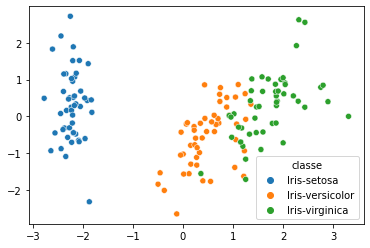

In [15]:
instancias_classes = data["classe"]
sns.scatterplot(x=projected[:, 0], y=projected[:, 1], hue=instancias_classes)#dim1-pca, dim2-pca, classes

# Discretization

<AxesSubplot:>

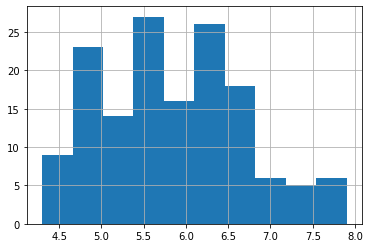

In [36]:
data['sepal_length'].hist(bins=10)
#data['sepal_length'].value_counts(sort=True)

In [28]:
#equal width method
bins = pd.cut(data['sepal_length'], 4)
bins.value_counts(sort=False)

(4.296, 5.2]    45
(5.2, 6.1]      50
(6.1, 7.0]      43
(7.0, 7.9]      12
Name: sepal_length, dtype: int64

In [29]:
#equal frequency method
bins = pd.qcut(data['sepal_length'], 4)
bins.value_counts(sort=False)

(4.2989999999999995, 5.1]    41
(5.1, 5.8]                   39
(5.8, 6.4]                   35
(6.4, 7.9]                   35
Name: sepal_length, dtype: int64

In [30]:
#using sklearn
data_np = np.array([5, 10, 11, 13, 15, 35, 50, 55, 72, 92, 204, 215])
#one feature/column
data_np = data_np.reshape(-1, 1)
data_np

array([[  5],
       [ 10],
       [ 11],
       [ 13],
       [ 15],
       [ 35],
       [ 50],
       [ 55],
       [ 72],
       [ 92],
       [204],
       [215]])

In [31]:
from sklearn.preprocessing import KBinsDiscretizer

#equal width method
disc = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
intervalos = disc.fit_transform(data_np)
intervalos

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [2.],
       [2.]])

In [32]:
#equal frequency method
disc = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
intervalos = disc.fit_transform(data_np)
intervalos

array([[0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.]])

In [33]:
#kmeans method
disc = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')
intervalos = disc.fit_transform(data_np)
intervalos

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [2.]])

# Encoding: Vide refs. slides

# Attribute Transformation: Vide refs. slides

# Distribuição Normal: Testes de Normalidade
𝐻0: A amostra é proveniente de uma população com distribuição normal, com média e desvio-padrão desconhecidos.

𝐻1: A amostra não é proveniente de uma população com distribuição normal.

<AxesSubplot:ylabel='Density'>

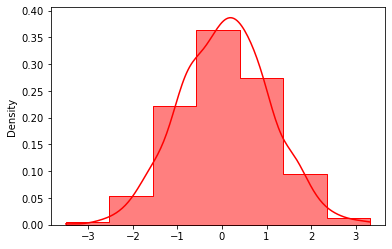

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

mu = 0
sigma2 = 1
s = np.random.normal(mu, sigma2, 1000) # geram-se 1000 valores da Normal(mu,sigma2)

sns.histplot(s, bins=7, color="red", stat="density", kde=True, element="step")

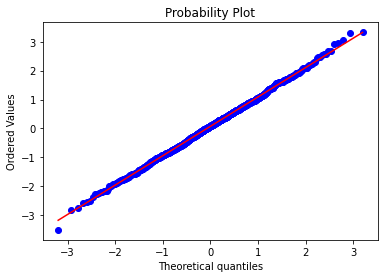

<Figure size 432x288 with 0 Axes>

In [23]:
#Gráfico de probabilidade da Normal, para checar suposição de tal distribuição dos dados
stats.probplot(s, plot=plt)
fig = plt.figure()

# Teste Shapiro-Wilk

In [24]:
from scipy.stats import shapiro

stat, p = shapiro(s)
print('Estatística=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Amostra segue a distribuição normal (não rejeita H0)')
else:
	print('Amostra não segue a distribuição normal (rejeita H0)')

Estatística=0.999, p=0.966
Amostra segue a distribuição normal (não rejeita H0)


# Teste de Kolmogorov-Smirnov

In [26]:
from scipy.stats import kstest

stat, p = kstest(s, 'norm')

print('Estatística=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Amostra segue a distribuição normal (não rejeita H0)')
else:
	print('Amostra não segue a distribuição normal (rejeita H0)')

Estatística=0.039, p=0.098
Amostra segue a distribuição normal (não rejeita H0)


In [ ]:
#OUTRO EXEMPLO!!!!!!!!!!!!!!!

<AxesSubplot:ylabel='Density'>

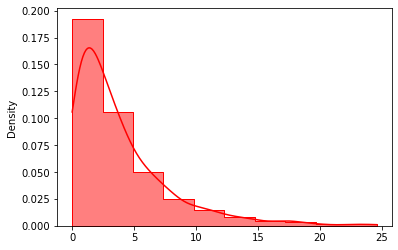

In [30]:
l = 4
s = np.random.exponential(l, 1000) # geram-se 1000 valores da Exponencial de média l

sns.histplot(s, bins=10, color="red", stat="density", kde=True, element="step")

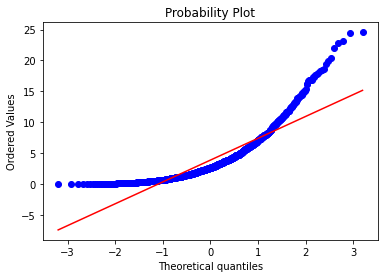

<Figure size 432x288 with 0 Axes>

In [31]:
# Gráfico de probabilidade da Normal, para checar suposição de tal distribuição dos dados
stats.probplot(s, plot=plt)
fig = plt.figure()

In [33]:
stat, p = shapiro(s)
print('Estatística=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Amostra segue a distribuição normal (não rejeita H0)')
else:
	print('Amostra não segue a distribuição normal (rejeita H0)')

Estatística=0.807, p=0.000
Amostra não segue a distribuição normal (rejeita H0)


In [34]:
stat, p = kstest(s, 'norm')

print('Estatística=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Amostra segue a distribuição normal (não rejeita H0)')
else:
	print('Amostra não segue a distribuição normal (rejeita H0)')

Estatística=0.625, p=0.000
Amostra não segue a distribuição normal (rejeita H0)
